In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

ins = pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


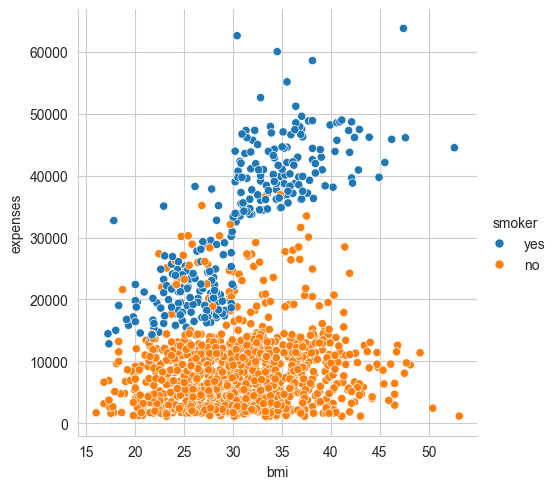

In [31]:
sns.set_style("whitegrid")
sns.relplot(x='bmi', y='expenses', data=ins, hue='smoker')

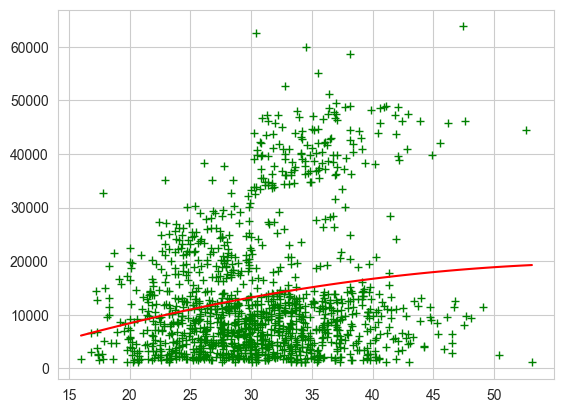

In [32]:
bmi = ins.bmi.values
expenses = ins.expenses.values

ins_reg = np.polyfit(bmi, expenses, 2)
g = np.poly1d(ins_reg)

x = np.linspace(min(bmi),max(bmi))
y = g(x)

plt.plot(bmi, expenses, "g+")
plt.plot(x, y, "r")

In [33]:
bmi = np.reshape(bmi, (len(bmi), 1))
expenses = np.reshape(expenses, (len(expenses), 1))

lr = LinearRegression()
lr.fit(bmi, expenses)

LinearRegression()

In [34]:
b = lr.intercept_
m = lr.coef_

print(f'intercept = ',b)
print(f'slope = ',m)
print(f'The equation is {b} + {m} * bmi')

intercept =  [1178.17954574]
slope =  [[394.32764384]]
The equation is [1178.17954574] + [[394.32764384]] * bmi


<Axes: xlabel='bmi', ylabel='expenses'>

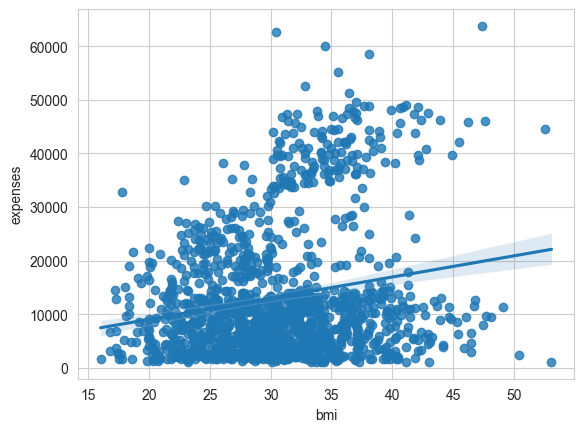

In [35]:
sns.regplot(x='bmi', y='expenses', data=ins)

In [36]:
x_eval = [31.7]
x = np.reshape(x_eval, (len(x_eval), 1))
predicted_expense = lr.predict(x)

print(f'The predicted insurance charges for someone with a BMI of 31.7 is {np.round(predicted_expense,2)}')

The predicted insurance charges for someone with a BMI of 31.7 is [[13678.37]]
